<a href="https://colab.research.google.com/github/Korniev/Data-Sciense/blob/main/hw_11/hw_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Домашнє завдання № 11

В якості домашнього завдання вам пропонується створити рекурентну нейронну мережу за допомогою механізмів Keras, яка буде класифікувати рецензії із датасету imdb.

На відміну від прикладу в модулі 9 ми використаємо рекурентну нейронну мережу. Поекспериментуйте з будовою мережі - RNN, LSTM, двостороння та глибока.

Порівняйте результати та зробіть висновки.

Імпортуємо усі потрібні нам бібліотеки:

In [ ]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, Dropout
from keras.regularizers import l2

##Звичайна RNN

Супер, почнемо з реалізаціїї звичайної базової RNN і подивимось на результати, які ми отримаємо.

Для початку потрібно завантажити датасет imdb

Для цього встановлюємо гіперпараметри:

In [ ]:
max_features = 10000
maxlen = 500

І завантажимо датасет imdb:

In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 [==============================] - 0s 0us/step


Далі зробимо так званий паддінг послідовностей, тобто, перетворемо відгуки на вектори:

In [ ]:
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

Далі будуємо нашу базову RNN:

In [ ]:
model_rnn = Sequential()
model_rnn.add(Embedding(max_features, 32))
model_rnn.add(SimpleRNN(32))
model_rnn.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))

І робимо компліляцію, в якій передаємо оптимізатор RMSprop, функцію втрат бінарної кросентропії та у якості метрики як завжди передаємо точність:

In [ ]:
model_rnn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

Відобразимо нашу архітектуру моделі:

In [ ]:
model_rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322113 (1.23 MB)
Trainable params: 322113 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Далі проводимо навчання нашої моделі на 6 епохах та розміром бачу у 128:

In [ ]:
history = model_rnn.fit(x_train, y_train, epochs=6, batch_size=128, validation_split=0.3)

Epoch 1/6
137/137 [==============================] - 25s 169ms/step - loss: 0.6523 - acc: 0.6338 - val_loss: 0.4820 - val_acc: 0.8163
Epoch 2/6
137/137 [==============================] - 23s 171ms/step - loss: 0.4441 - acc: 0.8213 - val_loss: 0.4317 - val_acc: 0.8248
Epoch 3/6
137/137 [==============================] - 24s 177ms/step - loss: 0.3385 - acc: 0.8783 - val_loss: 0.4413 - val_acc: 0.8277
Epoch 4/6
137/137 [==============================] - 22s 162ms/step - loss: 0.2844 - acc: 0.9031 - val_loss: 0.3681 - val_acc: 0.8663
Epoch 5/6
137/137 [==============================] - 22s 163ms/step - loss: 0.2445 - acc: 0.9214 - val_loss: 0.3852 - val_acc: 0.8572
Epoch 6/6
137/137 [==============================] - 22s 163ms/step - loss: 0.2062 - acc: 0.9389 - val_loss: 0.4097 - val_acc: 0.8608


Також візуалізуємо отримані результати функцій втрат та метрики точності:

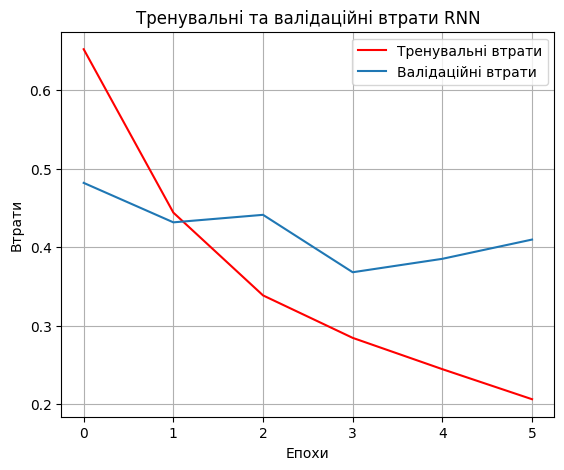

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Тренувальні втрати', color='red')
plt.plot(history.history['val_loss'], label='Валідаційні втрати')
plt.title('Тренувальні та валідаційні втрати RNN')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.grid(True)
plt.legend()


plt.show()

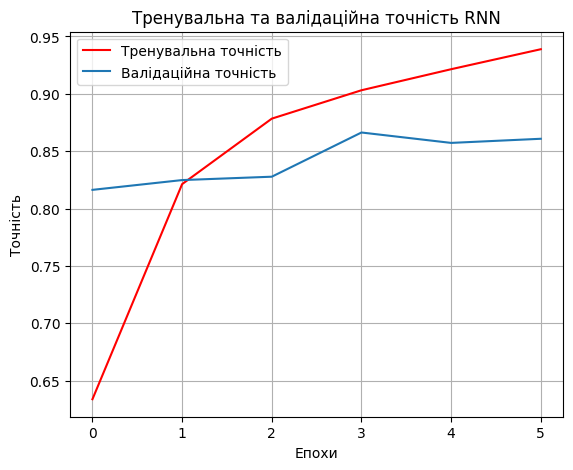

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='Тренувальна точність', color='red')
plt.plot(history.history['val_acc'], label='Валідаційна точність')
plt.title('Тренувальна та валідаційна точність RNN')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.grid(True)
plt.legend()

plt.show()

Після навчання моделі, ми можете оцінити її ефективність на тестовому наборі даних:

In [ ]:
predictions = model_rnn.predict(x_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}\n")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss_rnn, test_acc_rnn = model_rnn.evaluate(x_test, y_test)
print('Тестові втрати: {}'.format(test_loss_rnn))
print('Тестова точність: {}'.format(test_acc_rnn))


782/782 [==============================] - 19s 24ms/step
Прогнозоване: 0, Фактичне: 0

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 0, Фактичне: 1

Прогнозоване: 1, Фактичне: 0

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 0, Фактичне: 0

Прогнозоване: 1, Фактичне: 0

Прогнозоване: 1, Фактичне: 1

782/782 [==============================] - 20s 26ms/step - loss: 0.4273 - acc: 0.8512
Тестові втрати: 0.427261084318161
Тестова точність: 0.8512399792671204


Як бачимо, не найкращі результати. Хоча на тренувальних даних ми доходимо до точності у 95%, то на тестових - тільки 80..

Тому я застосував для повнозвʼязного шару Dense коефіцієнт регуляризації L2 0.01 для того, щоб зменшити перенавчання.  Зараз на виході наша модель показує 92% точності на тренувальних і 86% точності на тестових даних.

Як бачимо з наших прогнозів, то в нас правильно розпізнало 8 з 10 рецензів. Що як раз нам дає наші 87% точності на тестових даних.

##LSTM RNN

Тепер давайте спробуємо зробити те саме, але використовуючи тип архітектури рекурентних нейронних мереж LSTM

Для цього імпортуємо потрібні шари LSTM RNN:

In [ ]:
from keras.layers import Embedding, LSTM

In [ ]:
max_features = 10000
maxlen = 500

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

Побудуємо нашу модель LSTM:

In [ ]:
model_lstm = Sequential()
model_lstm.add(Embedding(max_features, 32, input_length=maxlen))
model_lstm.add(LSTM(32))
Dropout(0.1)
model_lstm.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.05)))

In [ ]:
model_lstm.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

Подивимось на архітектуру нашої LSTM RNN:

In [ ]:
model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 32)           320000    
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328353 (1.25 MB)
Trainable params: 328353 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Далі проводимо навчання нашої моделі на 6 епохах та розміром бачу у 128:

In [ ]:
history = model_lstm.fit(x_train, y_train, epochs=6, batch_size=128, validation_split=0.3)

Epoch 1/6
137/137 [==============================] - 55s 387ms/step - loss: 0.7106 - acc: 0.6029 - val_loss: 0.6397 - val_acc: 0.6895
Epoch 2/6
137/137 [==============================] - 49s 356ms/step - loss: 0.5354 - acc: 0.7930 - val_loss: 0.5477 - val_acc: 0.7623
Epoch 3/6
137/137 [==============================] - 53s 389ms/step - loss: 0.4525 - acc: 0.8407 - val_loss: 0.4404 - val_acc: 0.8465
Epoch 4/6
137/137 [==============================] - 48s 350ms/step - loss: 0.3863 - acc: 0.8777 - val_loss: 0.3988 - val_acc: 0.8567
Epoch 5/6
137/137 [==============================] - 48s 348ms/step - loss: 0.3449 - acc: 0.8977 - val_loss: 0.3650 - val_acc: 0.8815
Epoch 6/6
137/137 [==============================] - 47s 344ms/step - loss: 0.3147 - acc: 0.9102 - val_loss: 0.4523 - val_acc: 0.8324


Також візуалізуємо отримані результати функцій втрат та метрики точності:

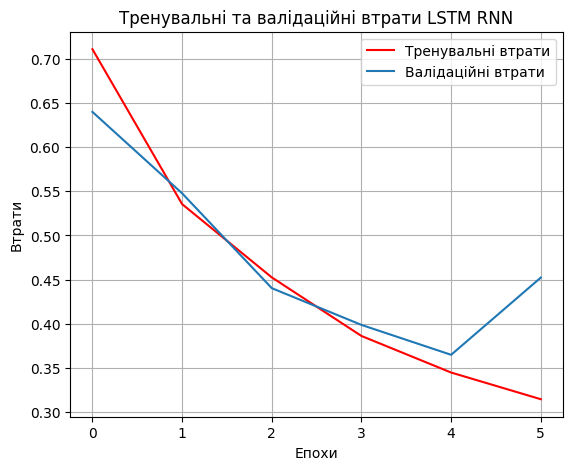

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Тренувальні втрати', color='red')
plt.plot(history.history['val_loss'], label='Валідаційні втрати')
plt.title('Тренувальні та валідаційні втрати LSTM RNN')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.grid(True)
plt.legend()


plt.show()

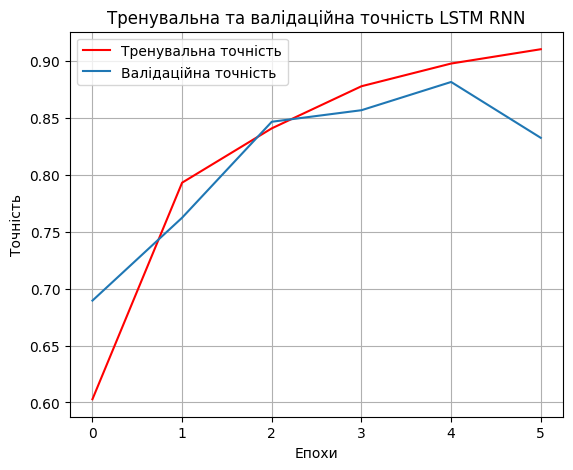

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='Тренувальна точність', color='red')
plt.plot(history.history['val_acc'], label='Валідаційна точність')
plt.title('Тренувальна та валідаційна точність LSTM RNN')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.grid(True)
plt.legend()

plt.show()

Після навчання моделі, ми можете оцінити її ефективність на тестовому наборі даних:

In [ ]:
predictions = model_lstm.predict(x_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}\n")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss_lstm, test_acc_lstm = model_lstm.evaluate(x_test, y_test)
print('Тестові втрати: {}'.format(test_loss_lstm))
print('Тестова точність: {}'.format(test_acc_lstm))

782/782 [==============================] - 36s 45ms/step
Прогнозоване: 0, Фактичне: 0

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 1, Фактичне: 0

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 0, Фактичне: 0

Прогнозоване: 1, Фактичне: 0

Прогнозоване: 1, Фактичне: 1

782/782 [==============================] - 35s 45ms/step - loss: 0.4601 - acc: 0.8277
Тестові втрати: 0.46014952659606934
Тестова точність: 0.8276799917221069


##GRU RNN

Тепер побудуємо модель GRU, яка є спрощеною версією LSTM, що використовує меншу кількість вентилів для регулювання інформаційного потоку через шар.

Імпортуємо шари GRU

In [ ]:
from keras.layers import Embedding, GRU

Побудуємо модель GRN RNN:

In [ ]:
model_gru = Sequential()
model_gru.add(Embedding(max_features, 32, input_length=maxlen))
model_gru.add(GRU(32))
Dropout(0.2)
model_gru.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))

In [ ]:
model_gru.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
model_gru.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 500, 32)           320000    
                                                                 
 gru (GRU)                   (None, 32)                6336      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 326369 (1.24 MB)
Trainable params: 326369 (1.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Натренуємо нашу модель на 6 епохах і бач 128:

In [ ]:
history = model_gru.fit(x_train, y_train, epochs=6, batch_size=128, validation_split=0.3)

Epoch 1/6
137/137 [==============================] - 49s 338ms/step - loss: 0.6949 - acc: 0.5732 - val_loss: 0.6151 - val_acc: 0.7009
Epoch 2/6
137/137 [==============================] - 46s 337ms/step - loss: 0.4618 - acc: 0.7958 - val_loss: 0.3886 - val_acc: 0.8412
Epoch 3/6
137/137 [==============================] - 46s 337ms/step - loss: 0.3445 - acc: 0.8670 - val_loss: 0.3580 - val_acc: 0.8569
Epoch 4/6
137/137 [==============================] - 45s 325ms/step - loss: 0.2954 - acc: 0.8955 - val_loss: 0.3409 - val_acc: 0.8661
Epoch 5/6
137/137 [==============================] - 46s 339ms/step - loss: 0.2672 - acc: 0.9063 - val_loss: 0.3664 - val_acc: 0.8527
Epoch 6/6
137/137 [==============================] - 47s 341ms/step - loss: 0.2727 - acc: 0.9038 - val_loss: 0.3445 - val_acc: 0.8675


Також візуалізуємо отримані результати функцій втрат та метрики точності:

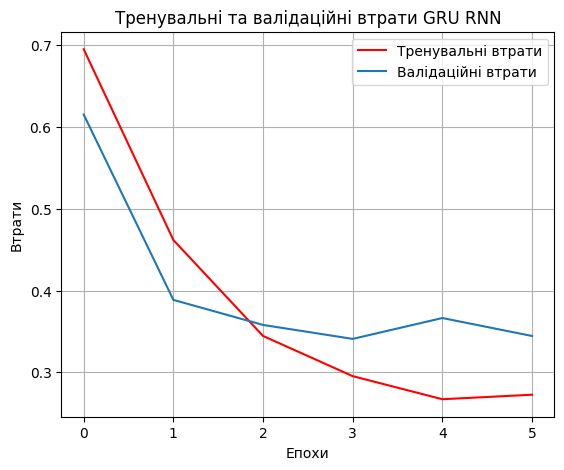

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Тренувальні втрати', color='red')
plt.plot(history.history['val_loss'], label='Валідаційні втрати')
plt.title('Тренувальні та валідаційні втрати GRU RNN')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.grid(True)
plt.legend()


plt.show()

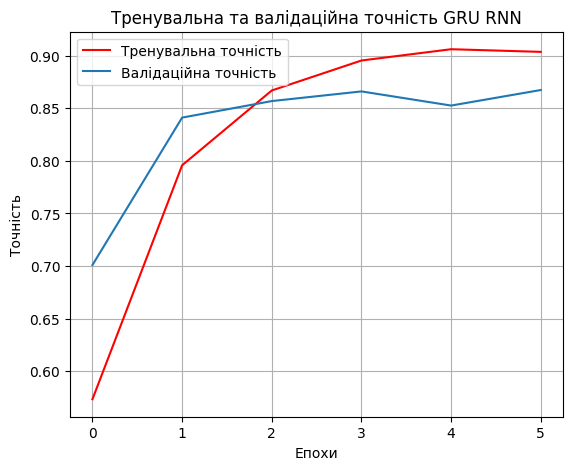

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='Тренувальна точність', color='red')
plt.plot(history.history['val_acc'], label='Валідаційна точність')
plt.title('Тренувальна та валідаційна точність GRU RNN')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.grid(True)
plt.legend()

plt.show()

Після навчання моделі, ми можете оцінити її ефективність на тестовому наборі даних:

In [ ]:
predictions = model_gru.predict(x_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}\n")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss_gru, test_acc_gru = model_gru.evaluate(x_test, y_test)
print('Тестові втрати: {}'.format(test_loss_gru))
print('Тестова точність: {}'.format(test_acc_gru))

782/782 [==============================] - 31s 39ms/step
Прогнозоване: 0, Фактичне: 0

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 0, Фактичне: 0

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 0, Фактичне: 0

Прогнозоване: 1, Фактичне: 0

Прогнозоване: 1, Фактичне: 1

782/782 [==============================] - 31s 40ms/step - loss: 0.3589 - acc: 0.8632
Тестові втрати: 0.3588697612285614
Тестова точність: 0.8631600141525269


##Bidirectional(двостороння) RNN

Імпортуємо потрібні шари:

In [ ]:
from keras.layers import Embedding, Bidirectional, LSTM

In [ ]:
max_features = 10000
maxlen = 500

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

Побудуємо модель BRNN:

In [ ]:
model_brnn = Sequential()
model_brnn.add(Embedding(max_features, 32, input_length=maxlen))
model_brnn.add(Bidirectional(LSTM(32, return_sequences=True)))
model_brnn.add(Bidirectional(LSTM(32)))
Dropout(0.1)
model_brnn.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.1)))

In [ ]:
model_brnn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
model_brnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 500, 32)           320000    
                                                                 
 bidirectional (Bidirection  (None, 500, 64)           16640     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                24832     
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 361537 (1.38 MB)
Trainable params: 361537 (1.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Натренуємо нашу модель на 6 епохах і бач 128:

In [ ]:
history = model_brnn.fit(x_train, y_train, epochs=6, batch_size=128, validation_split=0.3)

Epoch 1/6
137/137 [==============================] - 217s 2s/step - loss: 0.7875 - acc: 0.5295 - val_loss: 0.6920 - val_acc: 0.6441
Epoch 2/6
137/137 [==============================] - 257s 2s/step - loss: 0.5561 - acc: 0.7613 - val_loss: 0.5026 - val_acc: 0.7949
Epoch 3/6
137/137 [==============================] - 227s 2s/step - loss: 0.3980 - acc: 0.8634 - val_loss: 0.3974 - val_acc: 0.8596
Epoch 4/6
137/137 [==============================] - 223s 2s/step - loss: 0.3380 - acc: 0.8893 - val_loss: 0.3562 - val_acc: 0.8800
Epoch 5/6
137/137 [==============================] - 212s 2s/step - loss: 0.2919 - acc: 0.9131 - val_loss: 0.3532 - val_acc: 0.8809
Epoch 6/6
137/137 [==============================] - 191s 1s/step - loss: 0.2651 - acc: 0.9253 - val_loss: 0.3624 - val_acc: 0.8787


Також візуалізуємо отримані результати функцій втрат та метрики точності:

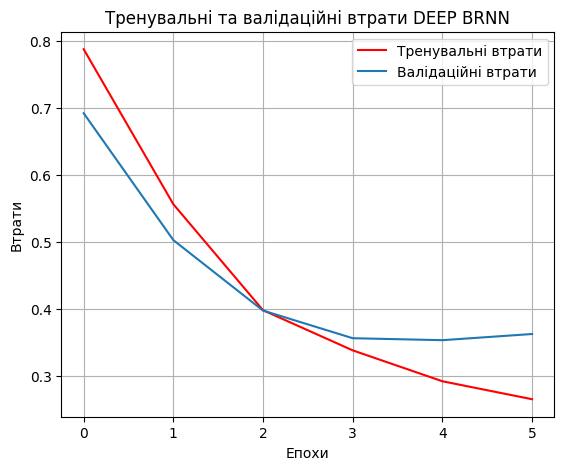

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Тренувальні втрати', color='red')
plt.plot(history.history['val_loss'], label='Валідаційні втрати')
plt.title('Тренувальні та валідаційні втрати DEEP BRNN')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.grid(True)
plt.legend()


plt.show()

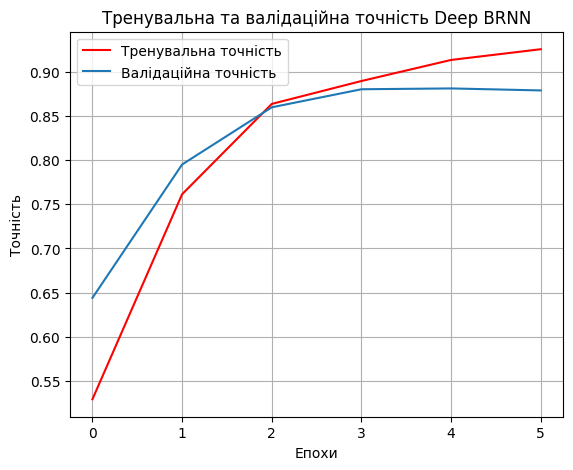

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='Тренувальна точність', color='red')
plt.plot(history.history['val_acc'], label='Валідаційна точність')
plt.title('Тренувальна та валідаційна точність Deep BRNN')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.grid(True)
plt.legend()

plt.show()

Після навчання моделі, ми можете оцінити її ефективність на тестовому наборі даних:

In [ ]:
predictions = model_brnn.predict(x_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}\n")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss_brnn, test_acc_brnn = model_brnn.evaluate(x_test, y_test)
print('Тестові втрати: {}'.format(test_loss_brnn))
print('Тестова точність: {}'.format(test_acc_brnn))

782/782 [==============================] - 119s 151ms/step
Прогнозоване: 0, Фактичне: 0

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 1, Фактичне: 0

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 0, Фактичне: 0

Прогнозоване: 1, Фактичне: 0

Прогнозоване: 1, Фактичне: 1

782/782 [==============================] - 118s 151ms/step - loss: 0.3781 - acc: 0.8708
Тестові втрати: 0.3780982792377472
Тестова точність: 0.8707600235939026


## Порівняння результатів точності і втрат

Тепер ми можемо зібрати усі отримані результати і порівняти їх, щоб зрозуміти де краще ми отримали результати.

Для початку зберемо усі отримані результати в один словник:

In [ ]:
results = {
    "SimpleRNN": {"test_loss": test_loss_rnn, "test_accuracy": test_acc_rnn},
    "LSTM  RNN": {"test_loss": test_loss_lstm, "test_accuracy": test_acc_lstm},
    "GRU   RNN": {"test_loss": test_loss_gru, "test_accuracy": test_acc_gru},
    "Bidir RNN": {"test_loss": test_loss_brnn, "test_accuracy": test_acc_brnn}
}


Тепер ми можемо вивести результати у вигляді таблиці:

In [ ]:
print("Модель\t\t  Тестова точність   Тестові втрати")
for model_name, metrics in results.items():
    print(f"{model_name}\t\t{metrics['test_accuracy']:.4f}\t\t{metrics['test_loss']:.4f}")


Модель		  Тестова точність   Тестові втрати
SimpleRNN		0.8512		0.4273
LSTM  RNN		0.8277		0.4601
GRU   RNN		0.8632		0.3589
Bidir RNN		0.8708		0.3781


І для більш наглядності також візуалізуємо отримані результати на графіках:

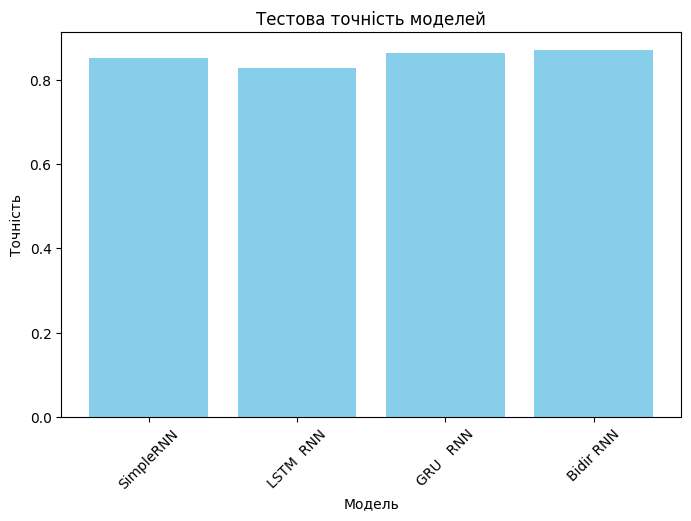

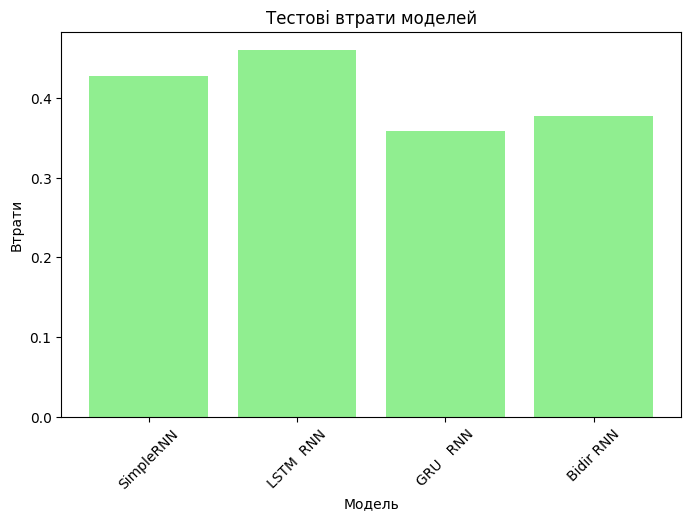

In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), [metrics['test_accuracy'] for metrics in results.values()], color='skyblue')
plt.title('Тестова точність моделей')
plt.ylabel('Точність')
plt.xlabel('Модель')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 5))
plt.bar(results.keys(), [metrics['test_loss'] for metrics in results.values()], color='lightgreen')
plt.title('Тестові втрати моделей')
plt.ylabel('Втрати')
plt.xlabel('Модель')
plt.xticks(rotation=45)
plt.show()

##Висновки

Отже, підібʼємо підсумки. В даній роботі ми побудували 4 типи рекурентних нейронних мереж. Для кожної з них ми застосували мінімальну архітектуру шарів, але, додаваючи регуляризація L2 та Dropout, так як в нас на кожному тренуванні було явне перенавчання. Кількість епох на кожному тренуванні становила 6 та розміру бачу 128.

Якщо зробити порівняння моделей, то найбільш точною на тестовому датасеті виявилась Глибока Bidirectional RNN зі своїми 87%, а найменш точною, як не дивно, LSTM яка показала лише 83% точності. GRU, яка є лайтовою версією LSTM показала нам 86% точності, враховуючи, що вона набагато швидше тренувалсь, ніж LSTM, зробимо висновки, що GRU дуже не погано себе показала.

Щодо порівнянь функції втрат, то найменші втрати показала знову ж таки GRU 0,35. Недалеко від неї глибока Bidirectional RNN зі своїми 0,37. Найгірший результат на втратах показала LSTM RNN.

Щодо фінального висновку:

Найкращими себе показали GRU RNN та Bidirect RNN. Найгіршою - LSTM RNN.

Хоча дуже важливо зауважити, що я хотів зменшити перенавчання на кожній з моделей, відповідно, додавав різні коефіцієнти регуляризаціїї L2 і також різний розмір Dropout.